In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
car_data = pd.read_csv('auto-mpg.csv')

In [78]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [79]:
# describe data
car_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [80]:
# get datatype of all columns
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [81]:
car_data = car_data.drop('car name', axis=1)
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [82]:
# swap category variable to one hot encoding
car_data = pd.get_dummies(car_data, columns=['origin'])
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [83]:
# Filter bad data (horse power in this case)
hpIsDigit = pd.DataFrame(car_data.horsepower.str.isdigit())
car_data[hpIsDigit['horsepower'] == False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [84]:
# replace undefined to nan so we can get median value and use median value for those missing vals 
car_data = car_data.replace('?', np.nan)
car_data[hpIsDigit['horsepower'] == False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [85]:
car_data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin_1           1.0
origin_2           0.0
origin_3           0.0
dtype: float64

In [86]:
# fill na value w/ median
median_filler = lambda x: x.fillna(x.median())
car_data = car_data.apply(median_filler, axis=0)
car_data['horsepower'] = car_data['horsepower'].astype('float64')

In [87]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


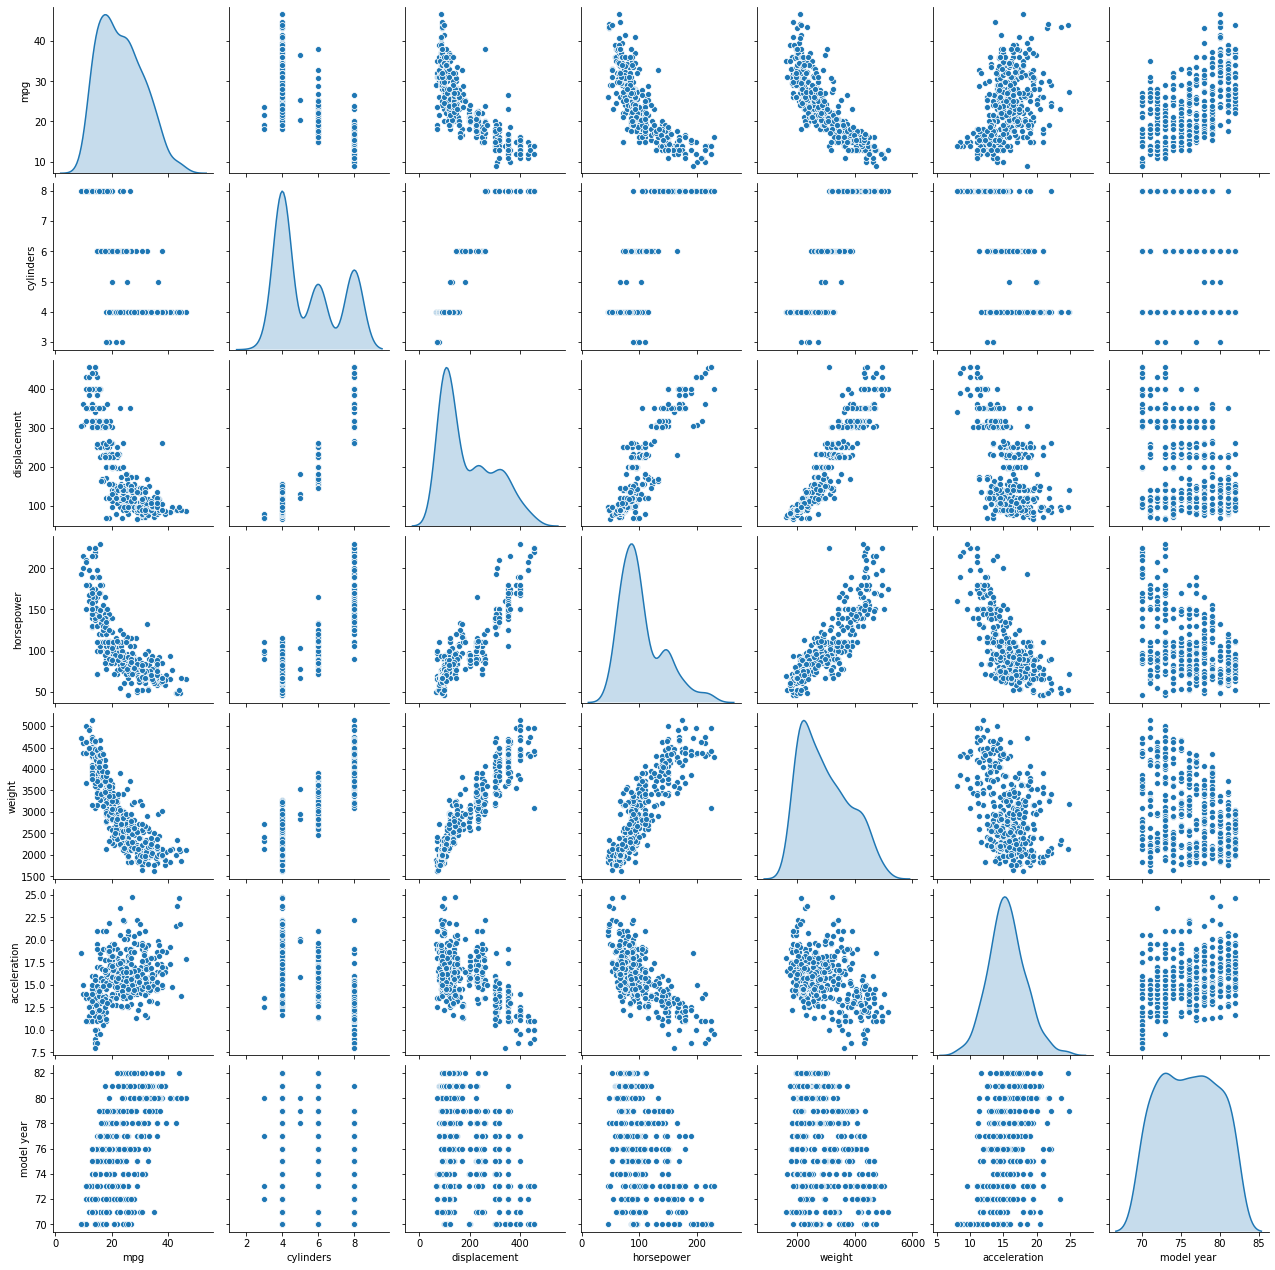

In [88]:
car_data_attr = car_data.iloc[:, 0:7]
sns.pairplot(car_data_attr, diag_kind='kde')

In [90]:
X = car_data.drop(['mpg', 'origin_3'], axis=1) #drop entire mpg and origin_3 column
y = car_data[['mpg']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [92]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [93]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for  {} {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient for  cylinders -0.39480796616483876
The coefficient for  displacement 0.028945510765487563
The coefficient for  horsepower -0.021752207723547443
The coefficient for  weight -0.007352032065147344
The coefficient for  acceleration 0.061919366007617736
The coefficient for  model year 0.8369338917645008
The coefficient for  origin_1 -2.395265036593775
The coefficient for  origin_2 0.6060179643247404


In [94]:
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The intercept is -18.889469080696866


In [95]:
# R^2 score
regression_model.score(X_train, y_train)

0.8141025501610559

In [96]:
regression_model.score(X_test, y_test)

0.8433135132808831

In [101]:
# change the training set to have more columns to see if we can improve the score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_cfg = linear_model.LinearRegression()
poly_cfg.fit(X_train2, y_train)
y_predict = poly_cfg.predict(X_test2)
# print(y_predict)
print('score  btw non-polynomial {} and polynomial {}  for training data'.format(regression_model.score(X_train, y_train), poly_cfg.score(X_train2, y_train)))

print('score btw non-polynomial {} and polynomial {} for testing data'.format(regression_model.score(X_test, y_test), poly_cfg.score(X_test2, y_test)))

print('shape of non-polynomial {} and polinomial {}'.format(X_train.shape, X_train2.shape))

score  btw non-polynomial 0.8141025501610559 and polynomial 0.9018808798695379  for training data
score btw non-polynomial 0.8433135132808831 and polynomial 0.8657912628934569 for testing data
shape of non-polynomial (278, 8) and polinomial (278, 37)
